In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mush.csv')

# EDA 

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

Dataset has 8124 rows and 23 columns.

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the features of the dataset are of object type

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset

In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Feature veil-color has only one value, hence it is needed to be removed.
Class has only two unique values i.e. it is a type of classification problem. 
Also,all the columns of our Dataframe has categorical values.

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Label class has almost equal values.

In [9]:
print('Percentage of poisonous mushroom and edible mushrrom in dataset')
print((df['class'].value_counts()/df['class'].value_counts().sum())*100)

Percentage of poisonous mushroom and edible mushrrom in dataset
e    51.797144
p    48.202856
Name: class, dtype: float64


 Dataset is not imbalanced

##### Since all the data is of object type we cannot see the statstics of the data such as skewness, standard deviations, mean, median, quartile ranges etc

In [10]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

So we encode all the features with label encoder

In [11]:
data=df.copy()

We keep a copy of our original data in case we need it later

In [12]:
for i in df.columns:
    df[i]=e.fit_transform(df[i])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We encode all the object type data into int tpe

In [13]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Columns such as cap-surface,cap-color,gill-attachment,gill-spacing,gill-size,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,spore-print-color,population,habitat are all skewed, which are needed to be handled properly

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


All the columns have count 8124 therefore no missing values. In many columns such as bruises, gill-spacing, gill-size variance is close to zero.Most variance is found in color column. Most of the data is left skewed as median is greater than the median but there are exceptions as well. No. of outliers are not much as quartile ranges do no show any exceptional change

### Univariate Analysis

Text(0.5, 1.0, 'Number of poisonous(1) and edible mushrooms(0)')

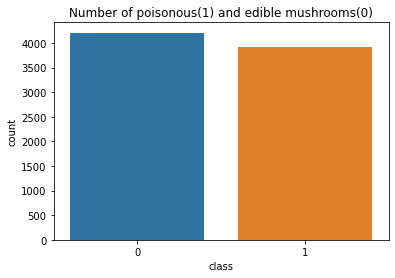

In [15]:
sns.countplot(df['class'])
plt.title('Number of poisonous(1) and edible mushrooms(0)')

Data is balanced, poisonous and edible mushrooms have almost equal number

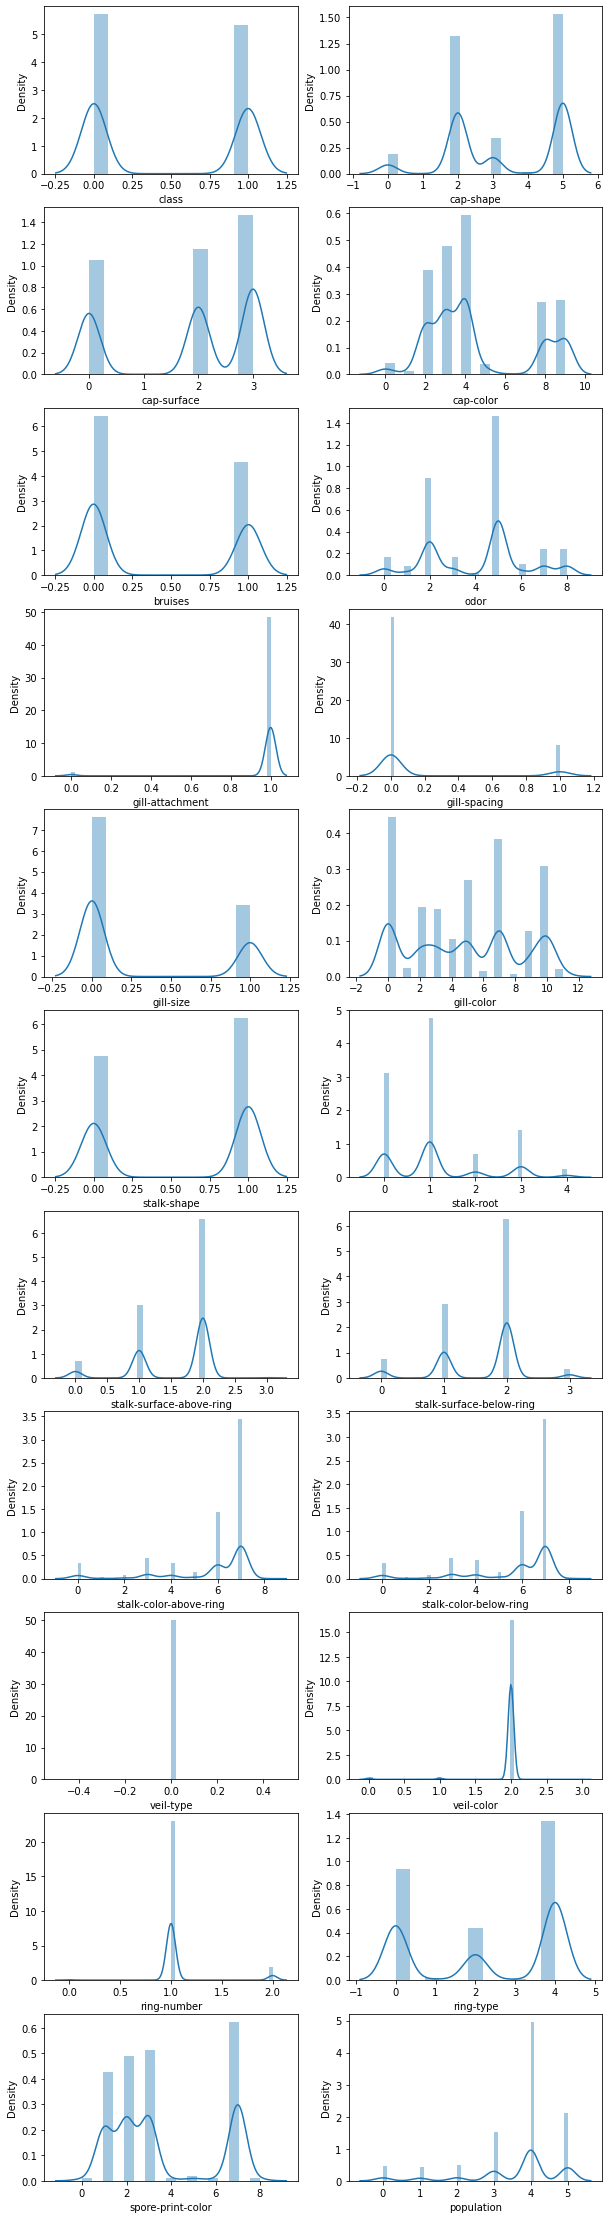

In [16]:
fig,ax=plt.subplots(11,2,figsize=(10,40))
r=0
c=0
for n,i in enumerate(df.iloc[:,:-1]):
    if n%2==0 and n>0:
        r+=1
        c=0
    sns.distplot(df[i],ax=ax[r,c])
    c+=1

Features such as ring number,veil color show gaussian distribution, rest all the features have a no. of local minima and maxima, and are skewed to the left or right 

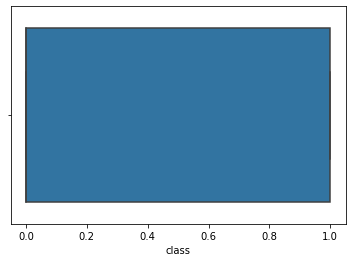

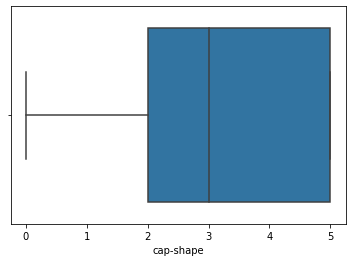

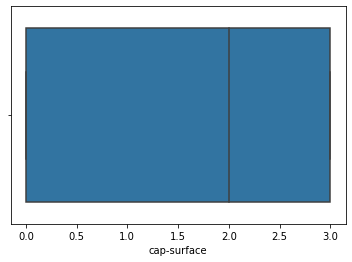

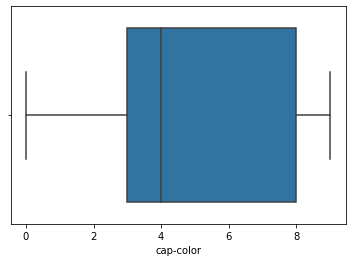

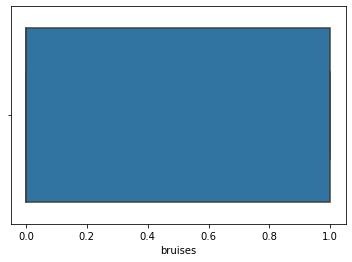

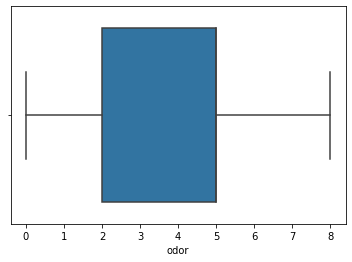

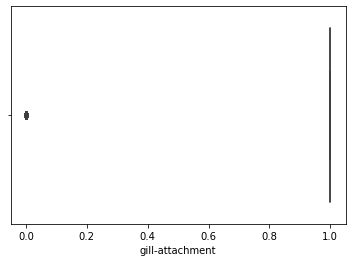

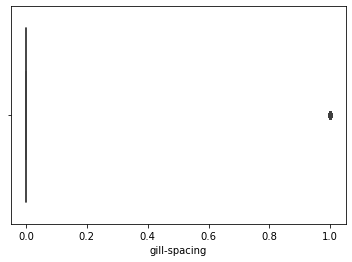

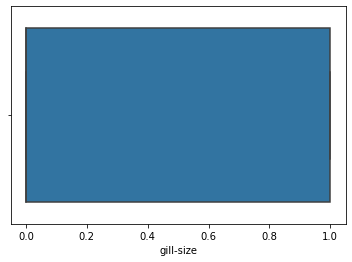

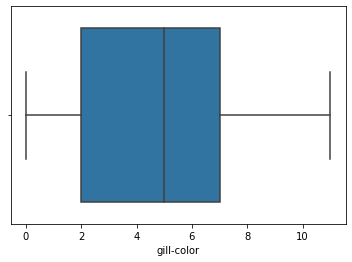

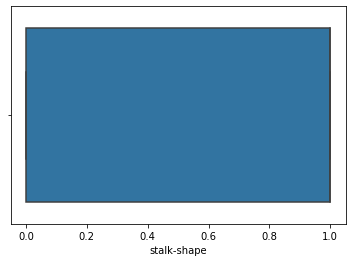

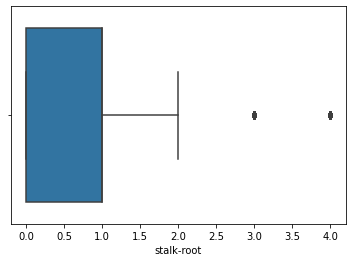

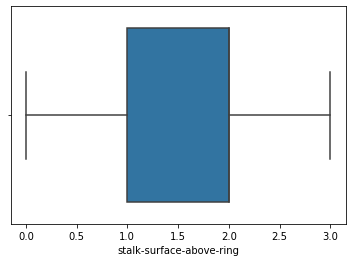

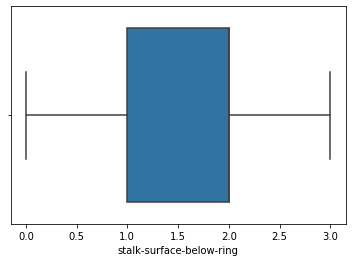

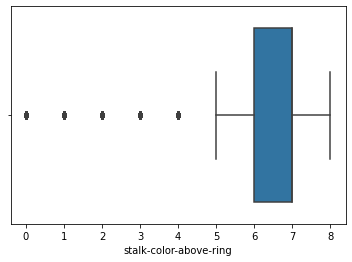

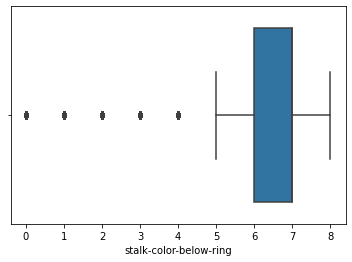

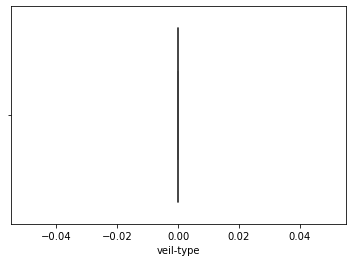

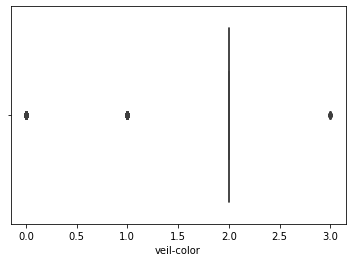

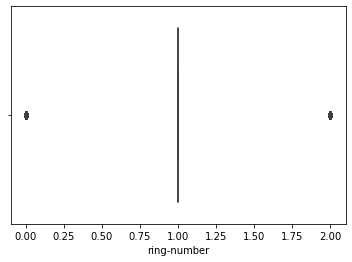

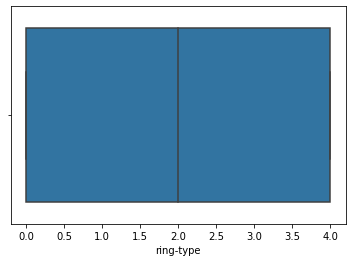

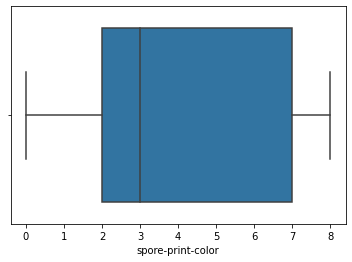

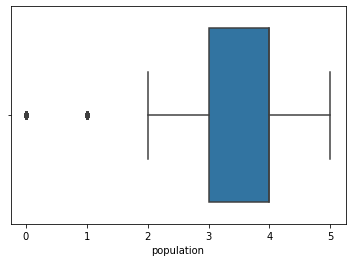

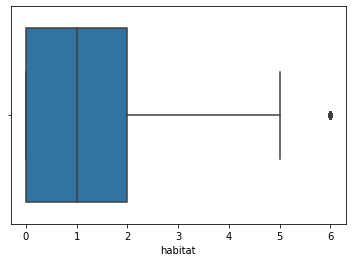

<Figure size 432x288 with 0 Axes>

In [17]:
for i in df.columns:
    sns.boxplot(df[i],orient='v')
    plt.figure()

As we assumed from previous analysis, there are very few outliers present only stalk-surface-above-ring and stalk-surface-below-ring feature show a no. of outliers

## Bivariate Analysis

Text(0.5, 0, 'Class (edible=0,poisonous=1)')

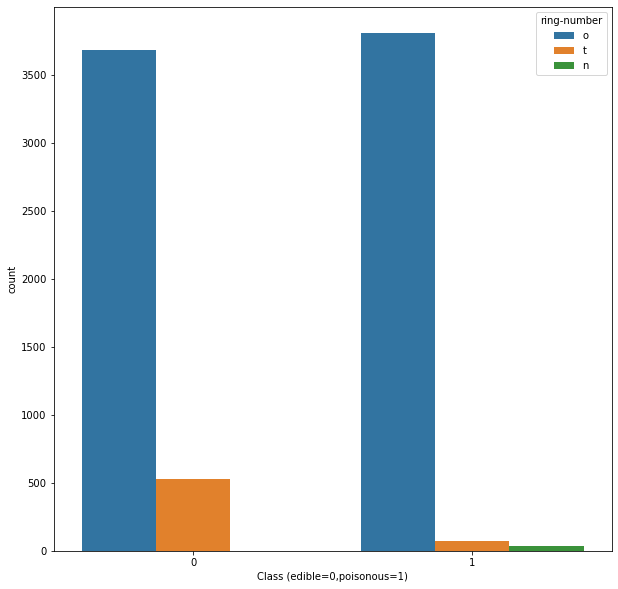

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df['class'],hue=data['ring-number'])
plt.xlabel('Class (edible=0,poisonous=1)')

From above graph we conclude that more than two rings are only present in poisonous mushroom

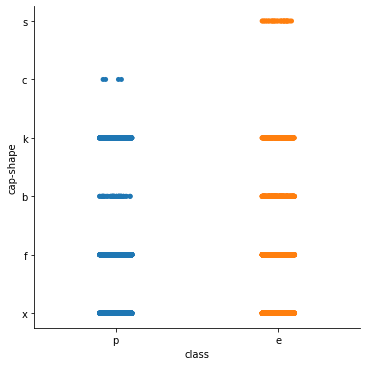

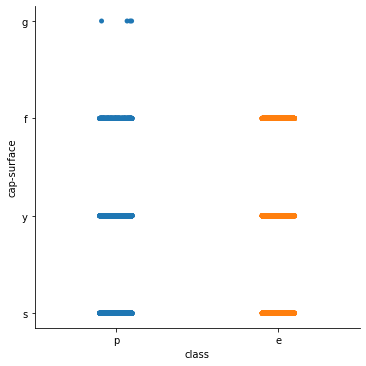

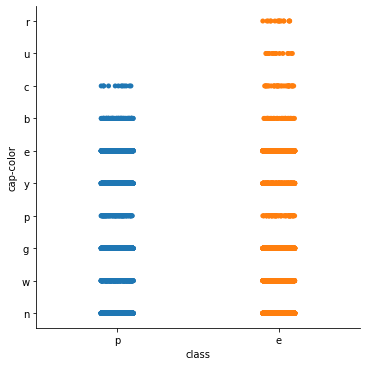

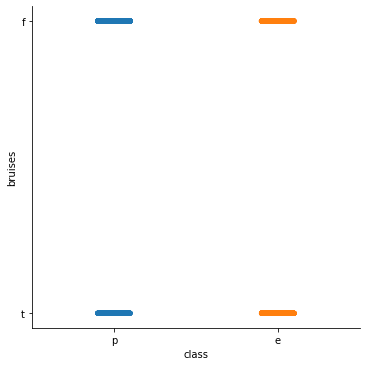

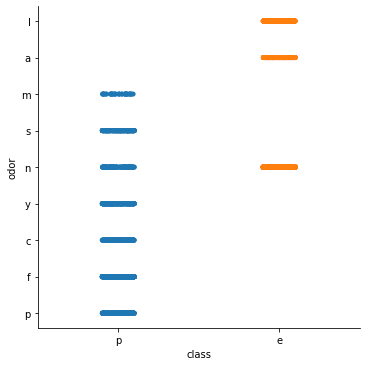

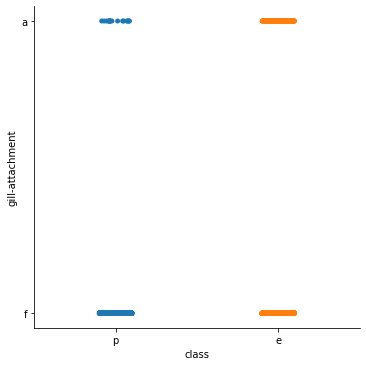

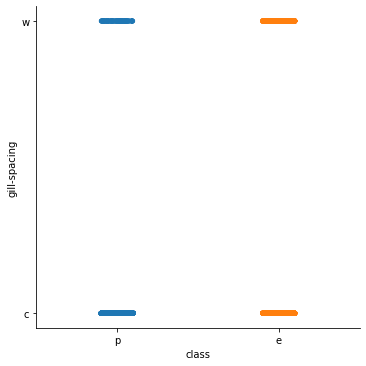

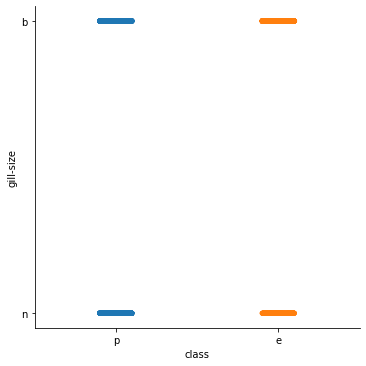

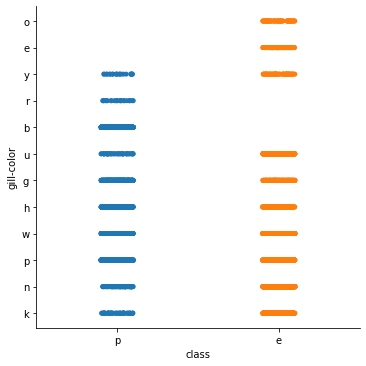

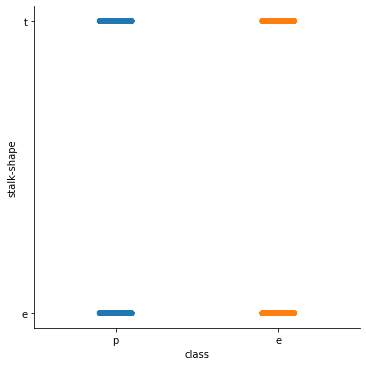

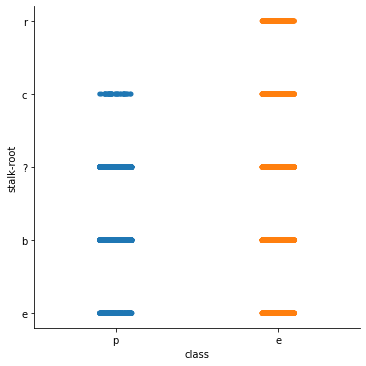

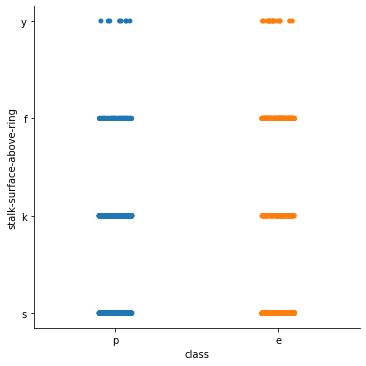

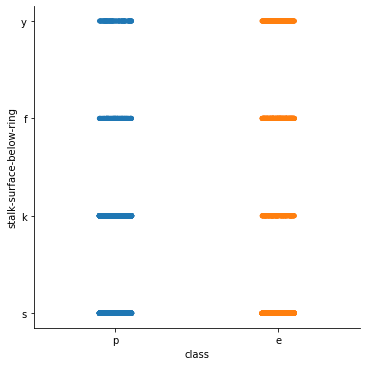

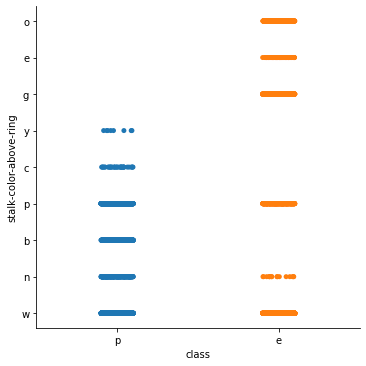

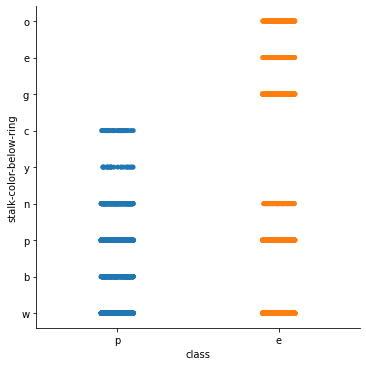

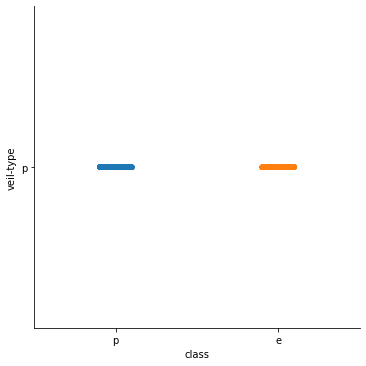

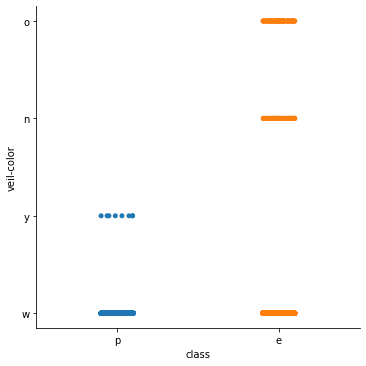

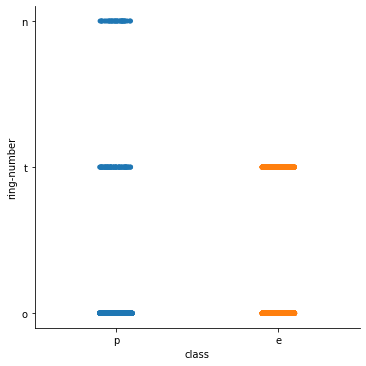

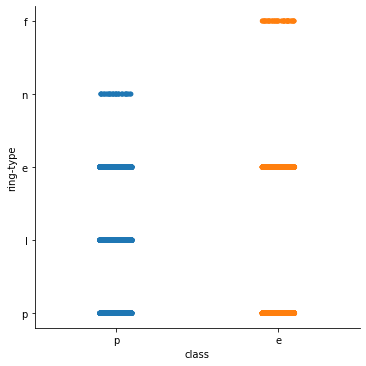

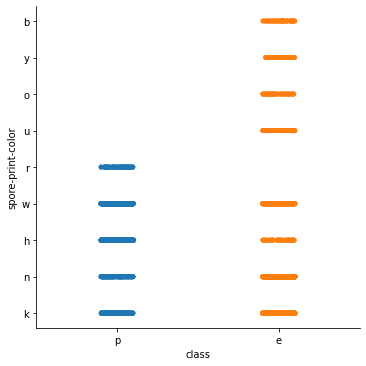

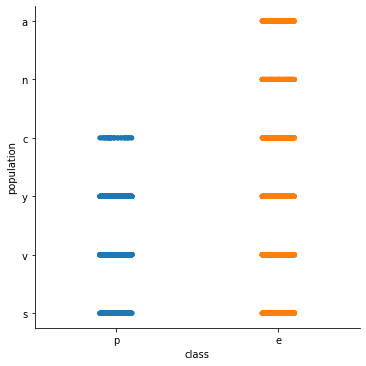

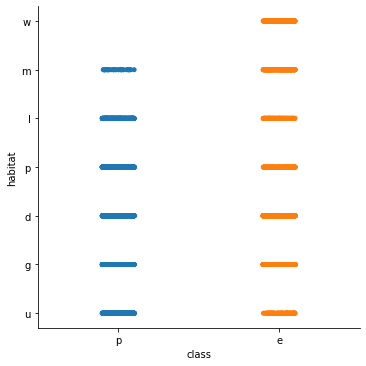

In [19]:
for i in df.columns:
    if i=='class':
        continue
    else:
        sns.catplot(x='class', y=i,data=data)

We cannot distinguish between poisonous and edible mushrooms based on a single feature except for some cases eg. some colour is only found in poisonous type,one of the cap shape is only found in edible and so on

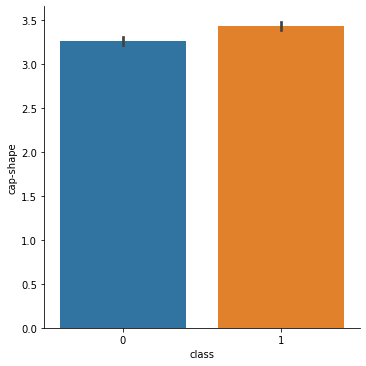

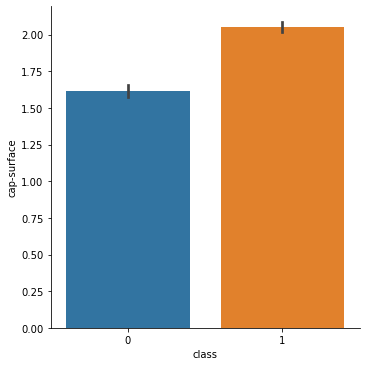

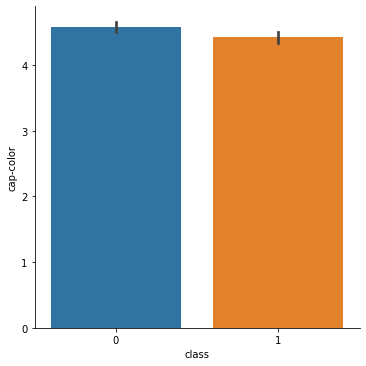

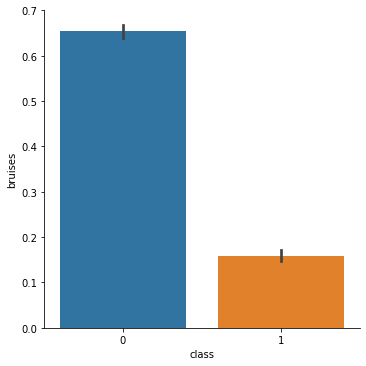

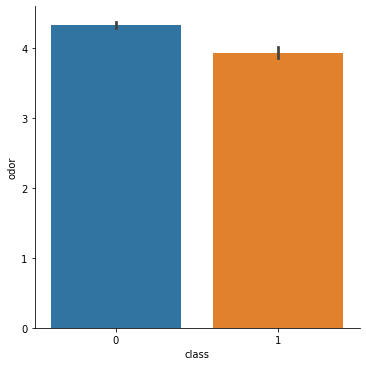

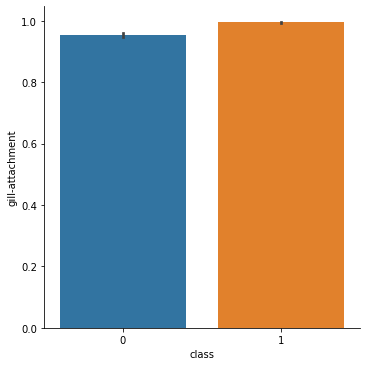

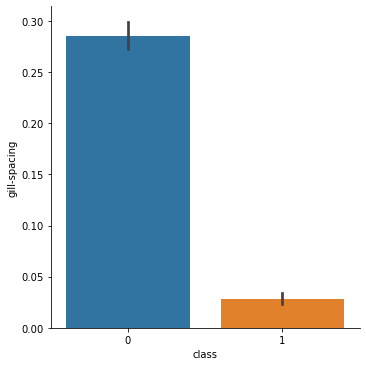

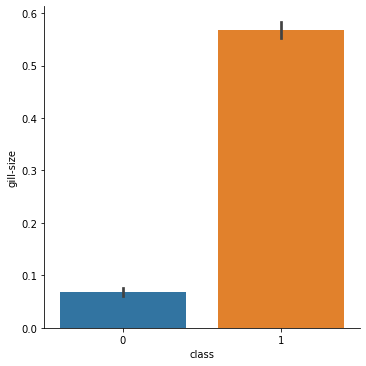

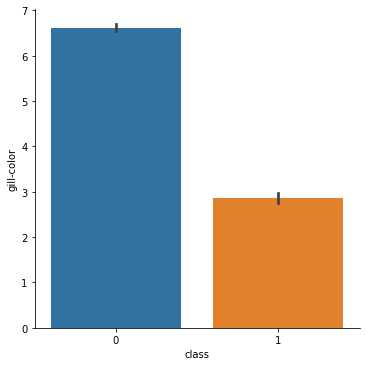

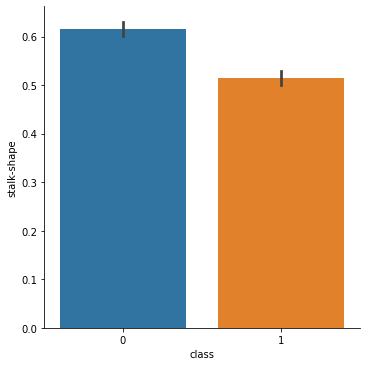

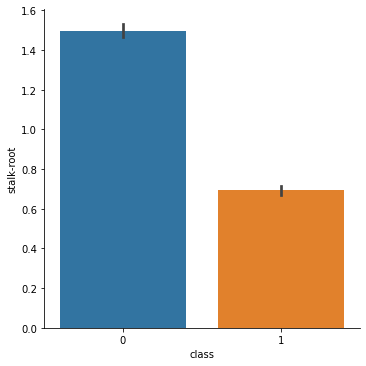

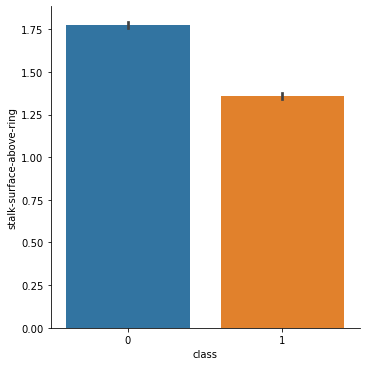

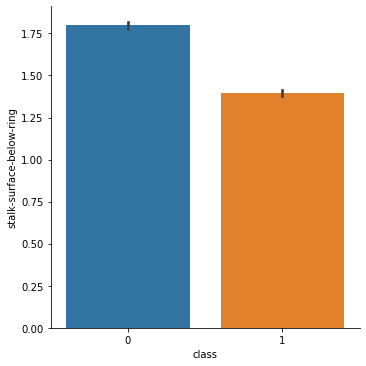

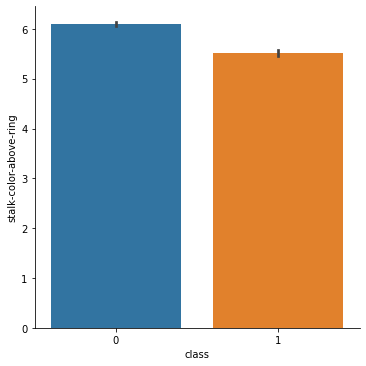

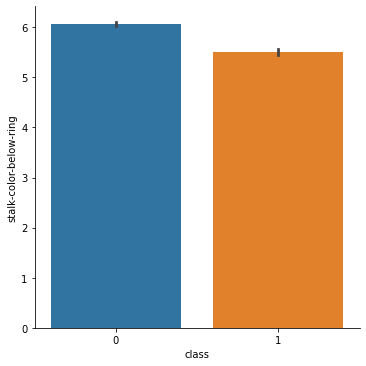

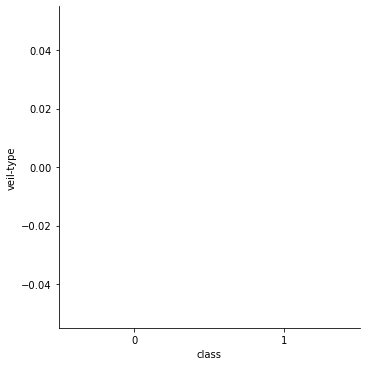

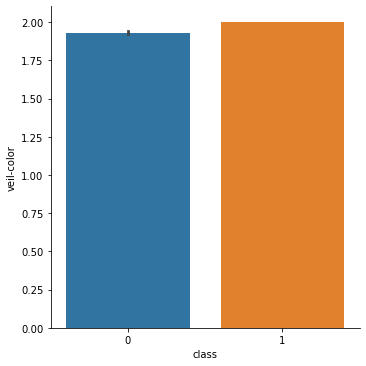

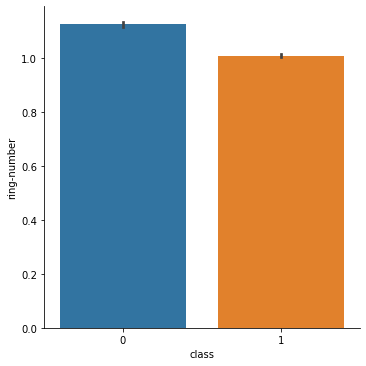

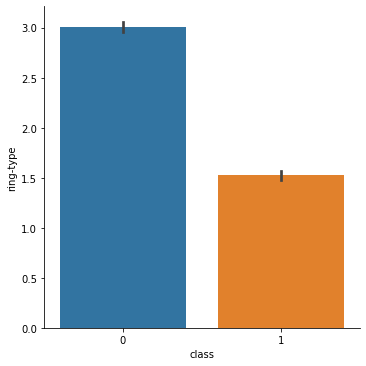

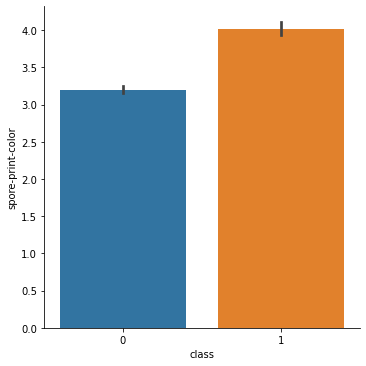

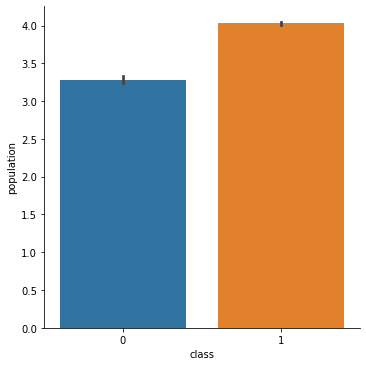

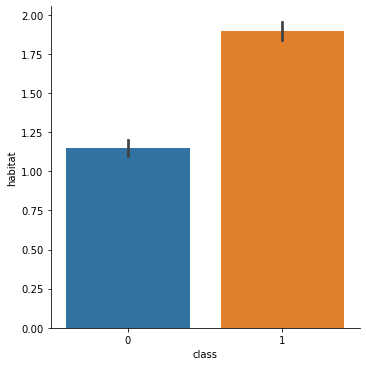

In [20]:
for i in df.columns:
    if i=='class':
        continue
    else:
        sns.catplot(x='class', y=i,data=df,kind='bar')

All the features seem to have almost equal no. of both type of mushrooms poisonous(1) and edible(0) except for gill slice, gill spacing, bruises etc

### Multivariate Analysis

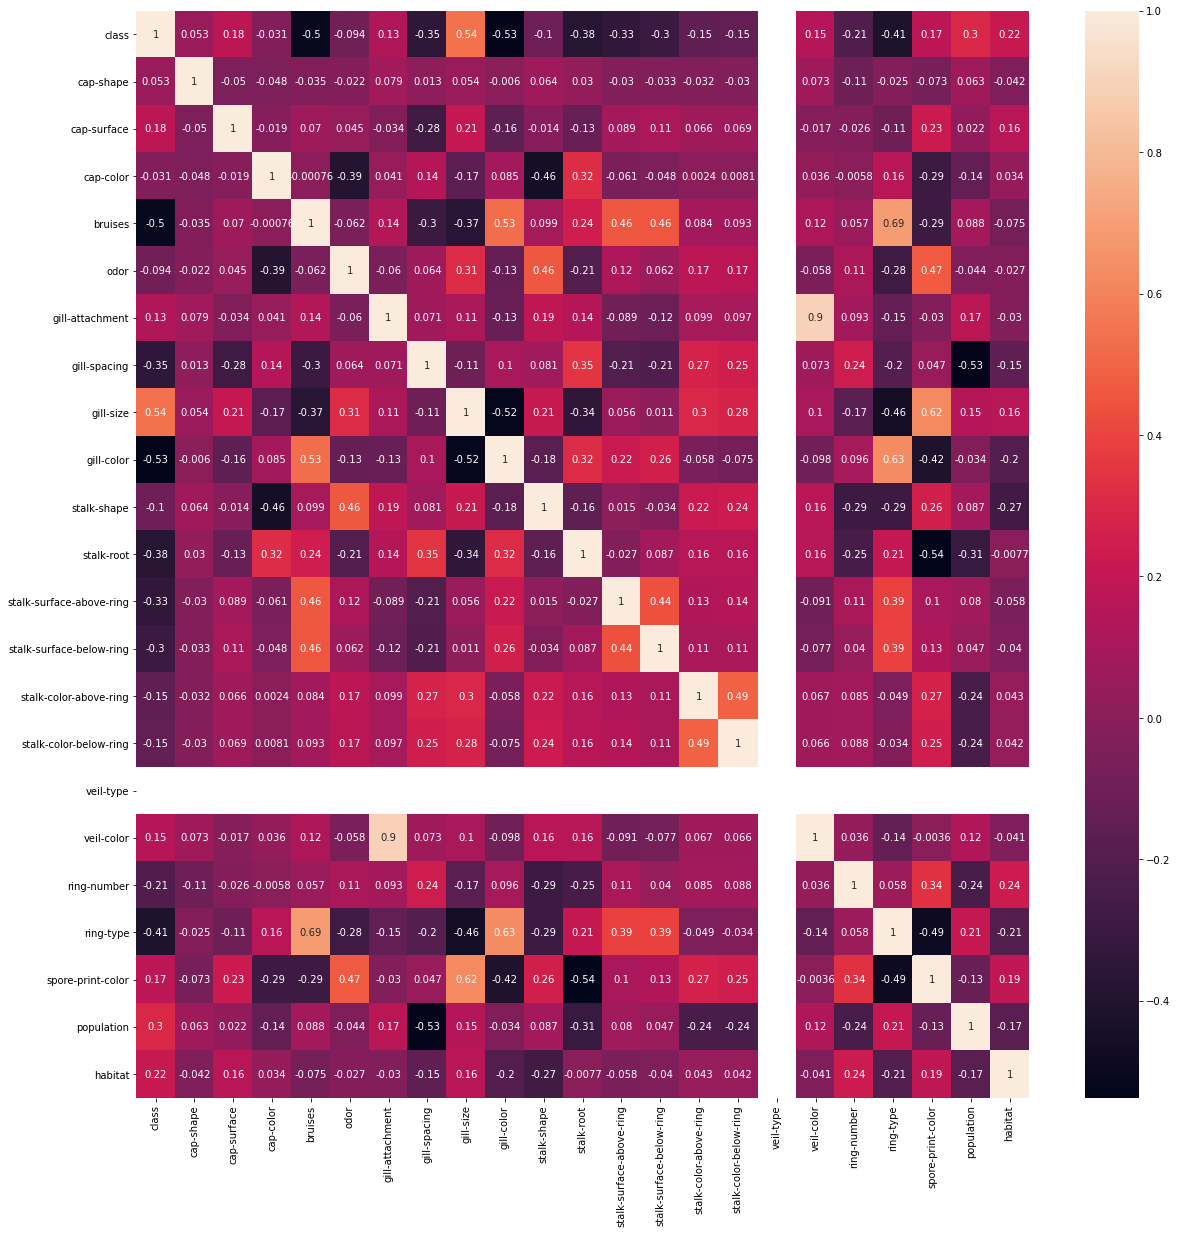

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Most correlation is shown by gill size and population, most of the features show a negative correlation with label class

# Feature Engineering

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
df.drop('veil-type',axis=1,inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Column veil-type had only one unique value so we dropped it

In [24]:
def zscoremethod():
    from scipy.stats import zscore
    z=np.abs(zscore(df))
    df_n=df[(z<3).all(axis=1)]
    return df_n

In [25]:
def iqrmethod():
    drop_outliers = np.array([])
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (1.5*iqr)
        lower_whisker = q1 - (1.5*iqr)
        s = df[col]
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        drop_outliers = np.append(drop_outliers, indexes)
    dropped = np.unique(drop_outliers)
    df_trim=df.drop(dropped)
    return df_trim

In [26]:
df_zscore=zscoremethod()
df_iqr=iqrmethod()
print('zscore',df_zscore.shape)
print('iqr',df_iqr.shape)

zscore (6568, 22)
iqr (3600, 22)


Since zscore method retains more rows after removing outliers we use zscore

In [27]:
df_new=df_zscore.copy()
df_new.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [28]:
x=df_new.copy()
x.drop('class',axis=1,inplace=True)
y=df_new['class']

Now we separate our dependent and independent features

In [29]:
print(x.shape)
x.head()

(6568, 21)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [30]:
print(y.shape)
y.head()

(6568,)


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

Both x and y have same no. of columns

In [31]:
x.skew()

cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

Skewness is reduced a little after removing outliers to reduce it further we are usning Power Transformer since negative skewness is also presentm

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

We use power transformer to remove skewness since negative skewness is also present

In [33]:
dfpt=pt.fit_transform(x)
x_pt=pd.DataFrame(dfpt,columns=x.columns)

In [34]:
x_pt.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.015390,0.013024,0.039290,1.064175,0.781824,0.0,-0.427782,1.273971,-0.013294,-1.533304,...,0.662927,0.482726,0.761788,0.752845,0.0,0.0,0.919846,-0.605320,-0.922921,1.553318
1,1.015390,0.013024,1.627378,1.064175,-1.946766,0.0,-0.427782,-0.784947,-0.013294,-1.533304,...,0.662927,0.482726,0.761788,0.752845,0.0,0.0,0.919846,0.041442,-1.629683,0.257843
2,-2.116475,0.013024,1.378921,1.064175,-0.576531,0.0,-0.427782,-0.784947,0.245155,-1.533304,...,0.662927,0.482726,0.761788,0.752845,0.0,0.0,0.919846,0.041442,-1.629683,1.160430
3,1.015390,0.988266,1.378921,1.064175,0.781824,0.0,-0.427782,1.273971,0.245155,-1.533304,...,0.662927,0.482726,0.761788,0.752845,0.0,0.0,0.919846,-0.605320,-0.922921,1.553318
4,1.015390,0.013024,-0.449256,-0.939695,0.329873,0.0,2.337641,-0.784947,-0.013294,0.652186,...,0.662927,0.482726,0.761788,0.752845,0.0,0.0,-1.199287,0.041442,-2.261860,0.257843


In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmax=MinMaxScaler()
ss=StandardScaler()

After that we Scale our values

In [36]:
xs=minmax.fit_transform(x_pt)
x_pt_min=pd.DataFrame(xs,columns=x_pt.columns)
xs=ss.fit_transform(x_pt)
x_pt_ss=pd.DataFrame(xs,columns=x_pt.columns)

We use both standard scaler and save the result in one variable and in another variable save the result of min max scaler

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

We import all the models needed

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
train_test=[df.iloc[:,1:],x,x_pt,x_pt_min,x_pt_ss]
train_test_y=[df['class'],y,y,y,y]
names=['Pure dataset after Label Encoding','After Removing Outliers','After removing outliers and skewness',
      'After removing outliers, skewness and performimg min max scaling',
      'After removing outliers, skewness and performimg standard scaling']

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [40]:
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [41]:
def create_model(model,rx,ry):
    xtrain,xtest,ytrain,ytest=train_test_split(rx,ry,test_size=0.25,random_state=7)
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=cross_val_score(m,rx,ry,cv=50)
    print(m)
    print('Accuracy',accuracy_score(p,ytest))
    print('Mean of Cross validation Score',score.mean())
    print('------------------------------------------------------------------------------')

Above Function creates model one by one from model list and trains them on all the 5 datadet

In [42]:
for i in models:
    for j in range(len(train_test)):
        print(names[j])
        create_model(i,train_test[j],train_test_y[j])

Pure dataset after Label Encoding
KNeighborsClassifier()
Accuracy 1.0
Mean of Cross validation Score 0.9988957055214724
------------------------------------------------------------------------------
After Removing Outliers
KNeighborsClassifier()
Accuracy 0.9987819732034104
Mean of Cross validation Score 0.9971142724959519
------------------------------------------------------------------------------
After removing outliers and skewness
KNeighborsClassifier()
Accuracy 1.0
Mean of Cross validation Score 1.0
------------------------------------------------------------------------------
After removing outliers, skewness and performimg min max scaling
KNeighborsClassifier()
Accuracy 1.0
Mean of Cross validation Score 1.0
------------------------------------------------------------------------------
After removing outliers, skewness and performimg standard scaling
KNeighborsClassifier()
Accuracy 1.0
Mean of Cross validation Score 1.0
----------------------------------------------------------

Above are the results of various models on various datasets. Results include accuracy of the model and Mean of 50 folds cross validation.

#### From the above results we see that Decision Tree, Random Forrest very well giving accuracy and mean of 50 fold cross validation as 1 but AdaBoost is clearly the WINNER which is performing exceptionally well for all the 5 datasets

So we create our final model.

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,1:],df['class'],test_size=0.25,random_state=7)

In [44]:
ab=AdaBoostClassifier()
ab.fit(xtrain,ytrain)
p=ab.predict(xtest)
score=cross_val_score(ab,df.iloc[:,1:],df['class'],cv=50)

In [45]:
print('Accuracy',accuracy_score(p,ytest))
print('Mean of Cross validation Score',score.mean())
print('Train',roc_auc_score(ytrain,ab.predict_proba(xtrain)[:,1]))
print('Test',roc_auc_score(ytest,ab.predict_proba(xtest)[:,1]))
print('-----------------------------------Confusion matrix----------------------------------------')
print(confusion_matrix(p,ytest))
print('---------------------------------Classification Report---------------------------------------')
print(classification_report(p,ytest))

Accuracy 1.0
Mean of Cross validation Score 1.0
Train 1.0
Test 1.0
-----------------------------------Confusion matrix----------------------------------------
[[1042    0]
 [   0  989]]
---------------------------------Classification Report---------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Above are the metrics for our final model.

In [46]:
fpred=pd.Series(ab.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

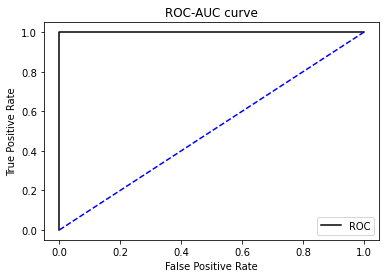

In [47]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

Above is the AUC ROC curve which shows that our modelis performing very well

NOTE- No Hypertuning is performed since we cannot do any better than this and here 100% accuracy does not mean overfitting of data as we have used a ensemble model and performed k fold cross validation too.

## Saving our model

In [48]:
import joblib
joblib.dump(ab,'posionous_mush.obj')

['posionous_mush.obj']